ex1

In [2]:
import pandas as pd

# Загрузка CSV
df = pd.read_csv('dataset_heart.csv')

# Просмотр первых строк
print(df.head())


   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced angina  oldpeak  ST segment  major vessels

Remove target column from training data

In [4]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']
# Просмотр первых строк
print(df.head())

   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced angina  oldpeak  ST segment  major vessels

Splitting input data into training and testing split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Understand the data

In [6]:
print(df.head())
df.info()

   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced angina  oldpeak  ST segment  major vessels

In [7]:
print(X.head())  # признаки без 'heart disease'
print(y.head())  # только целевой столбец

   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced angina  oldpeak  ST segment  major vessels

In [ ]:
print(X.shape[0])

prepared data for the model and baseline

Exercise 2

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Создание и обучение модели
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)

# Оценка качества
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9259259259259259


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exercise 3 : Logistic Regression with Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Модель
logreg = LogisticRegression(max_iter=1000)

# Сетка параметров
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # нужен для поддержки l1-регуляризации
}

# GridSearch
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Оценка на тесте
y_pred = best_model.predict(X_test)
print("Best Accuracy:", accuracy_score(y_test, y_pred))
print("Best Params:", grid_search.best_params_)


Best Accuracy: 0.9074074074074074
Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


var.2

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Модель
logreg = LogisticRegression(max_iter=1000)

# Сетка параметров
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100,1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # нужен для поддержки l1-регуляризации
}

# GridSearch
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Оценка на тесте
y_pred = best_model.predict(X_test)
print("Best Accuracy:", accuracy_score(y_test, y_pred))
print("Best Params:", grid_search.best_params_)

Best Accuracy: 0.9074074074074074
Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Metrics for classification

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Предсказание
y_pred = best_model.predict(X_test)

# Расчёт метрик
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           1       0.89      0.97      0.93        33
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

Confusion Matrix:
[[32  1]
 [ 4 17]]


 **Exercise 4 : SVM without Grid Search**

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Создание модели с ручной настройкой гиперпараметров
svm_model = SVC(kernel='linear', C=1, gamma='scale')  # пример вручную заданных параметров
svm_model.fit(X_train, y_train)

# Предсказания
y_pred = svm_model.predict(X_test)

# Оценка
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8703703703703703


visualization of all four cores:

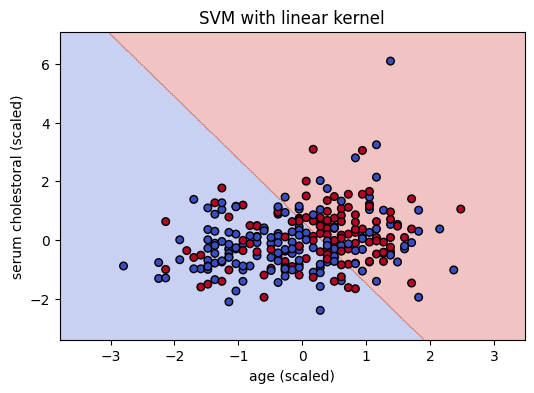

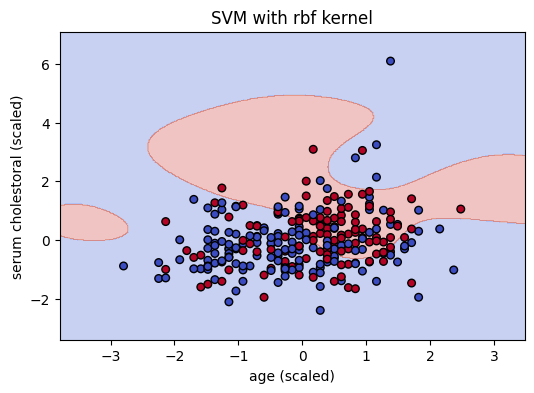

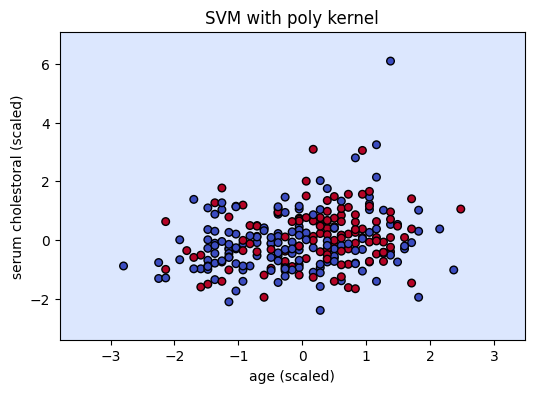

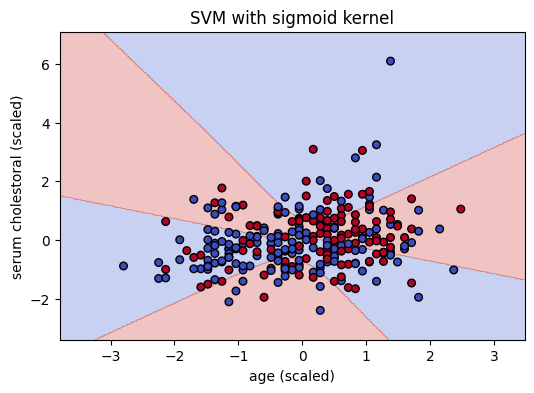

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 🔹 Выбор 2 признаков
X_vis = X[['age', 'serum cholestoral']].values
y_vis = y

# 🔸 Стандартизация
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# 📦 Добавим ядро sigmoid
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# 🔁 Визуализация для каждого ядра
for kernel in kernels:
    # Обучение модели
    model = SVC(kernel=kernel, C=10, gamma='scale', degree=3)
    model.fit(X_vis_scaled, y_vis)

    # Сетка координат
    x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
    y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Предсказание по сетке
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение графика
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"SVM with {kernel} kernel")
    plt.xlabel("age (scaled)")
    plt.ylabel("serum cholestoral (scaled)")
    plt.show()


compare two cases: C=1 and C=100

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Функция для оценки модели
def evaluate_svm(C_value):
    print(f"\n🔧 Оценка SVM с C={C_value}")

    # Обучение модели
    model = SVC(kernel='rbf', C=C_value, gamma='scale')
    model.fit(X_train, y_train)

    # Предсказания
    y_pred = model.predict(X_test)

    # Accuracy на тесте
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test: {acc:.4f}")

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Кросс-валидация (по обучающей выборке!)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"CV mean: {cv_scores.mean():.4f} | CV std: {cv_scores.std():.4f}")

# 🔁 Проверка для C=1 и C=100
evaluate_svm(C_value=1)
evaluate_svm(C_value=100)



🔧 Оценка SVM с C=1
Accuracy on test: 0.6296
Confusion Matrix:
[[26  7]
 [13  8]]
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.79      0.72        33
           2       0.53      0.38      0.44        21

    accuracy                           0.63        54
   macro avg       0.60      0.58      0.58        54
weighted avg       0.61      0.63      0.61        54

Cross-validation scores: [0.59090909 0.6744186  0.58139535 0.60465116 0.62790698]
CV mean: 0.6159 | CV std: 0.0332

🔧 Оценка SVM с C=100
Accuracy on test: 0.8148
Confusion Matrix:
[[31  2]
 [ 8 13]]
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.94      0.86        33
           2       0.87      0.62      0.72        21

    accuracy                           0.81        54
   macro avg       0.83      0.78      0.79        54
weighted avg       0.82      0.81      0.81        54

Cross-validation sc

updated code that uses SVM with kernel='linear' for two C values: 1 and 100

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Функция для оценки линейного SVM
def evaluate_svm(C_value):
    print(f"\n🔧 Оценка SVM с kernel='linear' и C={C_value}")

    # Обучение модели
    model = SVC(kernel='linear', C=C_value)
    model.fit(X_train, y_train)

    # Предсказания
    y_pred = model.predict(X_test)

    # Accuracy на тесте
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test: {acc:.4f}")

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Кросс-валидация по обучающей выборке
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"CV mean: {cv_scores.mean():.4f} | CV std: {cv_scores.std():.4f}")

# 🔁 Проверка для C=1 и C=100
evaluate_svm(C_value=1)
evaluate_svm(C_value=100)



🔧 Оценка SVM с kernel='linear' и C=1
Accuracy on test: 0.8704
Confusion Matrix:
[[30  3]
 [ 4 17]]
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.91      0.90        33
           2       0.85      0.81      0.83        21

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54

Cross-validation scores: [0.75       0.79069767 0.93023256 0.8372093  0.76744186]
CV mean: 0.8151 | CV std: 0.0646

🔧 Оценка SVM с kernel='linear' и C=100
Accuracy on test: 0.9259
Confusion Matrix:
[[32  1]
 [ 3 18]]
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.97      0.94        33
           2       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93     

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Создание модели с ручной настройкой гиперпараметров
svm_model = SVC(kernel='linear', C=100, gamma='auto')  # пример вручную заданных параметров
svm_model.fit(X_train, y_train)

# Предсказания
y_pred = svm_model.predict(X_test)

# Оценка
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9259259259259259


manual selection of different gamma values ​​with fixed C=100

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gammas = [0.001, 0.01, 0.1, 1, 10, 100]

for gamma_value in gammas:
    print(f"\n🔧 Оценка SVM с kernel='rbf', C=100 и gamma={gamma_value}")
    model = SVC(kernel='rbf', C=100, gamma=gamma_value)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test: {acc:.4f}")

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"CV mean: {cv_scores.mean():.4f} | CV std: {cv_scores.std():.4f}")



🔧 Оценка SVM с kernel='rbf', C=100 и gamma=0.001
Accuracy on test: 0.5185
Confusion Matrix:
[[18 15]
 [11 10]]
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.55      0.58        33
           2       0.40      0.48      0.43        21

    accuracy                           0.52        54
   macro avg       0.51      0.51      0.51        54
weighted avg       0.53      0.52      0.52        54

Cross-validation scores: [0.65909091 0.60465116 0.55813953 0.65116279 0.69767442]
CV mean: 0.6341 | CV std: 0.0482

🔧 Оценка SVM с kernel='rbf', C=100 и gamma=0.01
Accuracy on test: 0.6111
Confusion Matrix:
[[22 11]
 [10 11]]
Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.67      0.68        33
           2       0.50      0.52      0.51        21

    accuracy                           0.61        54
   macro avg       0.59      0.60      0.59        54
weighted avg     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Cross-validation scores: [0.54545455 0.55813953 0.53488372 0.53488372 0.53488372]
CV mean: 0.5416 | CV std: 0.0092

🔧 Оценка SVM с kernel='rbf', C=100 и gamma=10
Accuracy on test: 0.6111
Confusion Matrix:
[[33  0]
 [21  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.61      1.00      0.76        33
           2       0.00      0.00      0.00        21

    accuracy                           0.61        54
   macro avg       0.31      0.50      0.38        54
weighted avg       0.37      0.61      0.46        54

Cross-validation scores: [0.54545455 0.55813953 0.53488372 0.53488372 0.53488372]
CV mean: 0.5416 | CV std: 0.0092

🔧 Оценка SVM с kernel='rbf', C=100 и gamma=100
Accuracy on test: 0.6111
Confusion Matrix:
[[33  0]
 [21  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.61      1.00      0.76        33
           2       0.00      0.00      0.00        21

    accuracy  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Experiments with the SVM model on a dataset for predicting heart disease revealed that the linear kernel (kernel='linear') with a regularization parameter C=100 provides better accuracy (about 93%) and balanced precision and recall metrics across classes.

**Exercise 5 : SVM with Grid Search**

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Задаём параметры для перебора
param_grid = {
    'C': [  90, 100, 110],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']  # gamma актуален только для rbf и poly
}

# Создаём объект GridSearchCV с SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=2)

# Обучаем GridSearchCV на обучающих данных
grid_search.fit(X_train, y_train)

# Лучшая модель после поиска
best_model = grid_search.best_estimator_

# Предсказания на тесте
y_pred = best_model.predict(X_test)

# Результаты
print("Best Params:", grid_search.best_params_)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'C': 90, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy on test set: 0.9444444444444444
Confusion Matrix:
 [[32  1]
 [ 2 19]]
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.97      0.96        33
           2       0.95      0.90      0.93        21

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54



In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Создание модели с ручной настройкой гиперпараметров
svm_model = SVC(kernel='linear', C=90)  # пример вручную заданных параметров
svm_model.fit(X_train, y_train)

# Предсказания
y_pred = svm_model.predict(X_test)

# Оценка
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


Optimal hyperparameters: C=90, kernel='linear', gamma='scale'.

The model achieves high accuracy — 94.4% on the test.

The confusion matrix shows only 3 errors out of 54 cases, which indicates a reliable classification.

The precision, recall and f1-score metrics for both classes are above 0.9, which indicates a balanced and effective model.

The linear kernel is great for this task, the model separates classes well.

** Exercise 6 : XGBoost without Grid Search**

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_train_bin = y_train.replace({1: 0, 2: 1})
y_test_bin = y_test.replace({1: 0, 2: 1})
# Создаём модель с базовой ручной настройкой
xgb_model = XGBClassifier(
    n_estimators=250,     # количество деревьев
    max_depth=6,          # глубина дерева — баланс между переобучением и недообучением
    learning_rate=1,    # скорость обучения
    use_label_encoder=False,  # отключаем предупреждение
    eval_metric='logloss',    # стандартная метрика для классификации
    random_state=80
)

# Обучение модели
xgb_model.fit(X_train, y_train_bin)

# Предсказания
y_pred = xgb_model.predict(X_test)

# Оценка
print("Accuracy:", accuracy_score(y_test_bin, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred))
print("Classification Report:\n", classification_report(y_test_bin, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:15:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8333333333333334
Confusion Matrix:
 [[30  3]
 [ 6 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



Exercise 7 : XGBoost with Grid Search

In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Перекодировка меток: 1 → 0, 2 → 1
y_train_bin = y_train.replace({1: 0, 2: 1})
y_test_bin = y_test.replace({1: 0, 2: 1})

# Сетка параметров (3 значения на каждую переменную)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
}

# Модель
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение
grid_search.fit(X_train, y_train_bin)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)

# Оценка
print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test_bin, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred))
print("Classification Report:\n", classification_report(y_test_bin, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.7592592592592593
Confusion Matrix:
 [[31  2]
 [11 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83        33
           1       0.83      0.48      0.61        21

    accuracy                           0.76        54
   macro avg       0.79      0.71      0.72        54
weighted avg       0.78      0.76      0.74        54



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:17:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


var2

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Перекодировка меток: 1 → 0, 2 → 1
y_train_bin = y_train.replace({1: 0, 2: 1})
y_test_bin = y_test.replace({1: 0, 2: 1})

# Сетка параметров (3 значения на каждую переменную)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Модель
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение
grid_search.fit(X_train, y_train_bin)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)

# Оценка
print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test_bin, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred))
print("Classification Report:\n", classification_report(y_test_bin, y_pred))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.7}
Accuracy: 0.8333333333333334
Confusion Matrix:
 [[32  1]
 [ 8 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        33
           1       0.93      0.62      0.74        21

    accuracy                           0.83        54
   macro avg       0.86      0.79      0.81        54
weighted avg       0.85      0.83      0.82        54



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:22:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


var3

In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Перекодировка меток: 1 → 0, 2 → 1
y_train_bin = y_train.replace({1: 0, 2: 1})
y_test_bin = y_test.replace({1: 0, 2: 1})

# Сетка параметров (3 значения на каждую переменную)
param_grid = {
    'n_estimators': [200, 300, 400],           # больше деревьев для лучшего обучения
    'max_depth': [3, 4, 5],                    # чуть более глубокие деревья
    'learning_rate': [0.005, 0.01, 0.02],     # меньше скорость обучения для точности
    'subsample': [0.6, 0.7, 0.8],              # сэмплинг строк для снижения переобучения
    'colsample_bytree': [0.7, 0.8, 0.9],       # сэмплинг признаков для разнообразия деревьев
    'min_child_weight': [1, 3, 5],             # регуляризация по весу детей для борьбы с шумом
    'scale_pos_weight': [1, 1.5, 2]            # балансировка классов для улучшения recall у минорного класса
}

# Модель
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение
grid_search.fit(X_train, y_train_bin)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)

# Оценка
print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test_bin, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred))
print("Classification Report:\n", classification_report(y_test_bin, y_pred))

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


KeyboardInterrupt: 

To long

var3

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Перекодировка меток: 1 → 0, 2 → 1
y_train_bin = y_train.replace({1: 0, 2: 1})
y_test_bin = y_test.replace({1: 0, 2: 1})

# Сетка параметров (3 значения на каждую переменную)
param_grid = {
    'n_estimators': [100, 200, 300],      # количество деревьев
    'max_depth': [3, 5, 7],               # глубина деревьев
    'learning_rate': [0.01, 0.05, 0.1],  # скорость обучения
}

# Модель
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение
grid_search.fit(X_train, y_train_bin)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания
y_pred = best_model.predict(X_test)

# Оценка
print("Best Params:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test_bin, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred))
print("Classification Report:\n", classification_report(y_test_bin, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.7777777777777778
Confusion Matrix:
 [[30  3]
 [ 9 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        33
           1       0.80      0.57      0.67        21

    accuracy                           0.78        54
   macro avg       0.78      0.74      0.75        54
weighted avg       0.78      0.78      0.77        54



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:30:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
